## SVM Classification of Iris flower image dataset from Kaggle

### Step-1 Detailed Exploratory Data Analysis

In [102]:
import numpy as np # Numerical data manipulation
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns #data visualization
sns.set_context('notebook')
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
plt.rcParams["figure.autolayout"] = False
plt.style.use('seaborn')
# palette ="muted" #palatte='pastel'
sns.set_theme(style="whitegrid", palette="muted")
#sns.set(style="whitegrid", palette="pastel", color_codes=True)
palette = itertools.cycle(sns.color_palette())
colors = plt.rcParams["axes.prop_cycle"]()
c = next(colors)["color"]

In [76]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Species is the output label-y varible to be predicted 
Other columns are the input features X=X1,X2,X3,X4,X5

In [77]:
#Rename columns
df.rename({'SepalLengthCm': 'sepal_length',
           'SepalWidthCm': 'sepal_width',
           'PetalLengthCm': 'petal_length',
           'PetalWidthCm': 'petal_width',
           'Species': 'species'          
          }, inplace=True,axis=1)
df.describe()

,Id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [78]:
#calculate median of each species
df_median = df.groupby('species').median()
df_median

,Id,sepal_length,sepal_width,petal_length,petal_width
species,,,,,
Iris-setosa,25.5,5.0,3.4,1.50,0.2
Iris-versicolor,75.5,5.9,2.8,4.35,1.3
Iris-virginica,125.5,6.5,3.0,5.55,2.0


In [79]:
df = df.drop(['Id'], axis=1) #drop Id column

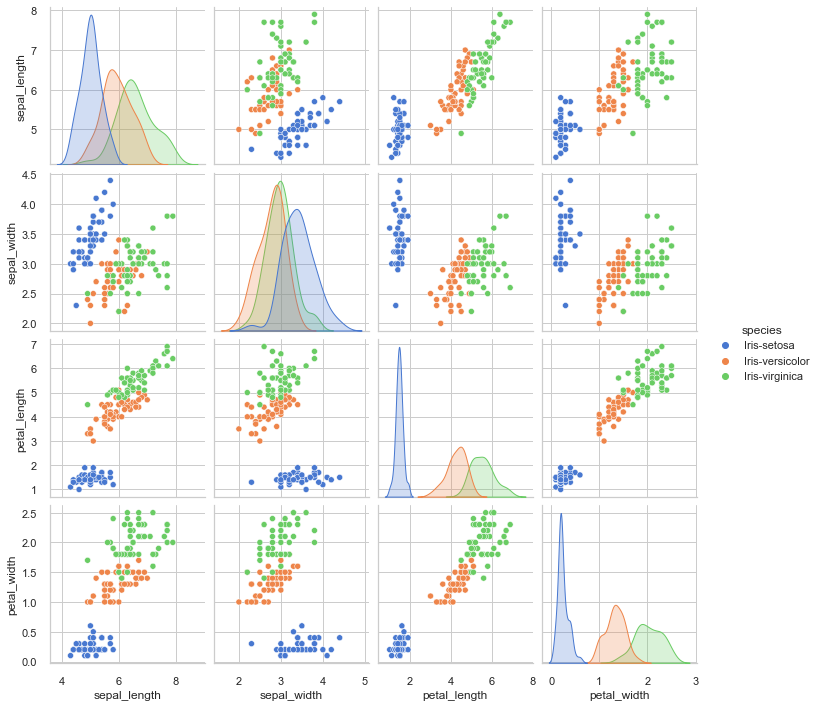

In [39]:
sns.pairplot(df_without_Id,hue='species',palette='muted') #Pairplot to examine the correlations

Iris-setosa clearly appears as a separate class

Text(0, 0.5, 'Count')

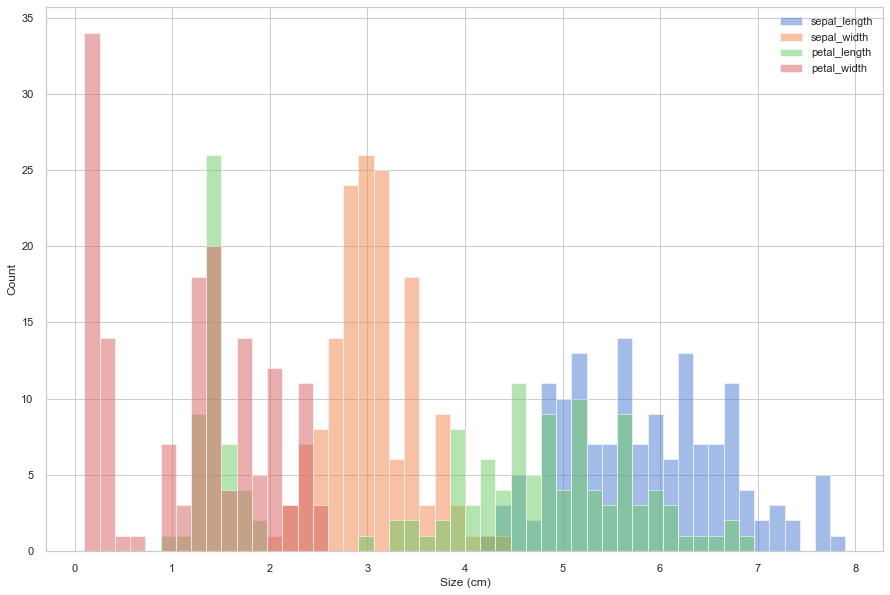

In [80]:
#Distribution Analysis using Histograms
ax = df.plot.hist(bins=50, alpha = 0.5, figsize=(15,10))
ax.set_xlabel('Size (cm)')
ax.set_ylabel('Count')

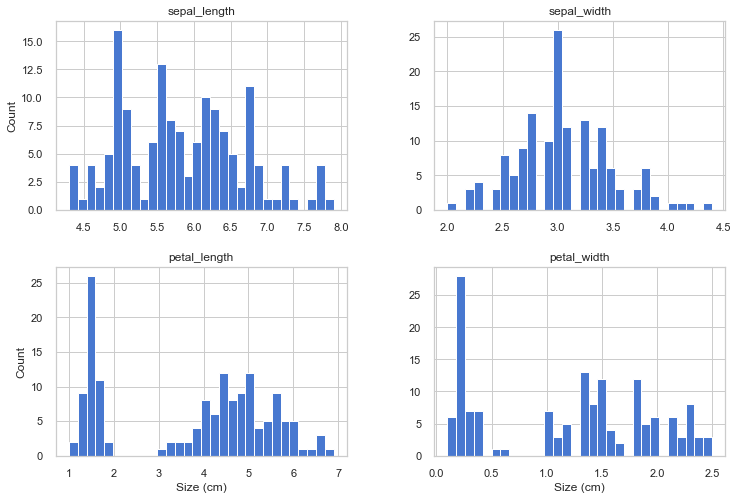

In [50]:
axes = df.hist(bins= 30, figsize=(12,8))
for ax in axes.flatten():
    if ax.get_subplotspec().is_last_row():
        ax.set_xlabel('Size (cm)')       
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel('Count')

<AxesSubplot:>

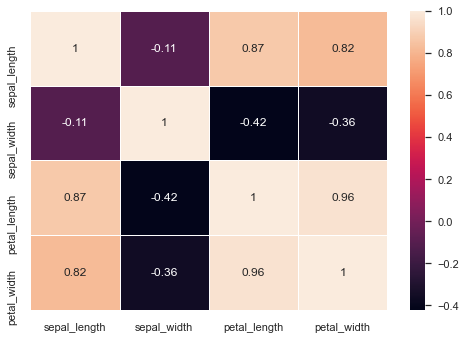

In [81]:
sns.heatmap(df.corr(method='pearson'), annot=True, linewidths=1) #HeatMap - Bivariate Correlation Analyis

In [82]:
reshaped_df = (df.set_index('species').stack().to_frame().reset_index())
reshaped_df

,species,level_1,0
0,Iris-setosa,sepal_length,5.1
1,Iris-setosa,sepal_width,3.5
2,Iris-setosa,petal_length,1.4
3,Iris-setosa,petal_width,0.2
4,Iris-setosa,sepal_length,4.9
...,...,...,...
595,Iris-virginica,petal_width,2.3
596,Iris-virginica,sepal_length,5.9
597,Iris-virginica,sepal_width,3.0
598,Iris-virginica,petal_length,5.1


<AxesSubplot:xlabel='dimensions', ylabel='size'>

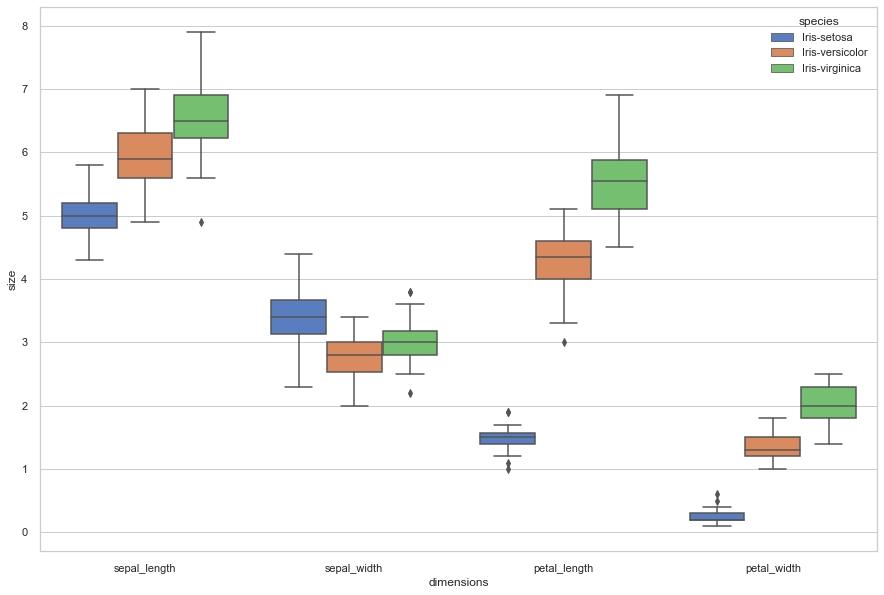

In [83]:
reshaped_df.rename({0:'size', 'level_1':'dimensions'}, inplace = True, axis=1)
reshaped_df
fig_boxplot = plt.figure(figsize=(15,10))
sns.boxplot(x ='dimensions', y='size', hue='species', data = reshaped_df)

Boxplot reveals the presence of anomalies called potential outliers which would lead to misclassification

### Step-2 Train Test Data Split

Split the dataset into a training set and a testing set.
Since it is a small dataset, no validation set is consider in this case
70:30 -> Train:Test Ratio %

In [99]:
X = df.drop(['species'], axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True, random_state= 15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

### Step-3 Train Support Vector Machine- SVM Classifier

Call the SVC() model from sklearn and fit the model to the training data.

In [100]:
model_svc = SVC(C=1.0, degree=3, gamma='auto', kernel='rbf', random_state=15, verbose=True)
model_svc.fit(X_train,y_train)

[LibSVM]

SVC(gamma='auto', random_state=15, verbose=True)

### Step-4 Model Performance Evaluation
Evaluate the trained model performance on test data. Calculate a confusion matrix and predict a classifications

In [101]:
y_predictions = model_svc.predict(X_test)
print(confusion_matrix(y_test,y_predictions))
print(classification_report(y_test,y_predictions))

[[15  0  0]
 [ 0 16  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Step-5 Hyperparameters Tuning Exercise using Gridsearch Method

In [106]:
param_search_grid = {'C': [0.1,1, 10, 50, 100], 'gamma': [1, 0.1, 0.01, 0.001]} 
model_svc_grid = GridSearchCV(SVC(kernel='rbf', random_state=15), param_search_grid, refit=True, verbose=5)
model_svc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.952, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.952, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.952, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.952, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.905, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.952, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=1.000, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.905, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


GridSearchCV(estimator=SVC(random_state=15),
             param_grid={'C': [0.1, 1, 10, 50, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=5)

In [107]:
y_grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,y_grid_predictions))
print(classification_report(y_test,y_grid_predictions))

[[15  0  0]
 [ 0 16  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Hence, tuned SVC model performs same as that of its default model provided the whole dataset was shuffled prior to train test split data splitting. Random seed for shuffling improved generalization on unseen test data. 